In [2]:
import pandas as pd
# 난방효율성 데이터
df = pd.read_csv('c:/data/energy/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
train_cols = df.columns[0:8]
print(train_cols)
X = df[train_cols]
y = df['Y1'] # 난방 하중
y.head()

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')


0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

<AxesSubplot:>

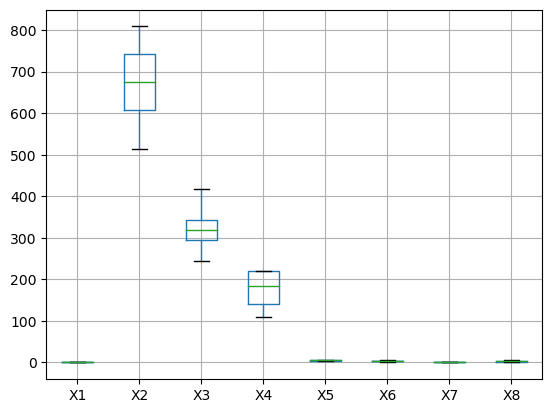

In [14]:
X.boxplot()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
#학습용 데이터셋의 변수들의 평균값
mean_on_train = X_train.mean(axis=0)

In [7]:
#학습용 데이터셋의 변수들의 표준편차값
std_on_train = X_train.std(axis=0)

In [9]:
#Standardization 표준화 - 평균: 0, 표준편차: 1
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

                 X1            X2            X3            X4            X5  \
count  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02   
mean  -1.573009e-15 -6.746147e-17  3.618028e-16  7.941179e-17  7.247289e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.346764e+00 -1.817237e+00 -1.712958e+00 -1.498746e+00 -9.751352e-01   
25%   -9.654262e-01 -7.719025e-01 -5.749374e-01 -6.825365e-01 -9.751352e-01   
50%   -2.027511e-01  1.340545e-01 -5.927190e-03  9.498830e-01 -9.751352e-01   
75%    6.552584e-01  9.703225e-01  5.630831e-01  9.498830e-01  1.023718e+00   
max    2.085274e+00  1.527835e+00  2.270114e+00  9.498830e-01  1.023718e+00   

                 X6            X7            X8  
count  5.760000e+02  5.760000e+02  5.760000e+02  
mean   3.854941e-17  2.937465e-16 -4.375358e-17  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.329847e+00 -1.775710e+00 -1.827180e+00  
25%   -4.297389e-01 -1.026125e+00 -5.2

<AxesSubplot:>

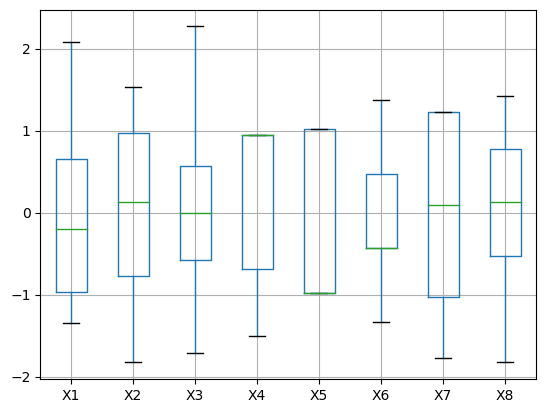

In [15]:
X_train_scaled.boxplot()

In [10]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train_scaled, y_train)
a = model.predict(X_test_scaled)
print(a.flatten())
b = y_test.values.flatten()
print(b)

[15.29  10.455 36.3   16.695 32.54  28.94  28.47  28.945 28.915 30.615
  6.59  36.135 13.115 41.96  35.615 25.24  10.7   27.205 15.305 12.66
 12.91  32.755 10.65  38.855  6.19  14.655 12.675 13.4   10.92  32.85
 14.205 14.76  42.205 15.095 28.56  36.77  14.455 36.545 18.28   7.89
 11.42  40.    14.6   25.685 18.5   24.195 10.94  12.905 28.91  31.95
 32.705 12.82  32.785 14.73  36.52  10.405 18.505 33.85  32.165 14.35
 15.09  12.63  32.45  10.37  12.9   12.38  39.425 10.98  25.46  32.905
 32.755 10.675 29.755 16.845 13.375 33.72  32.68  32.25  32.695 14.605
 35.125 28.94  13.31  15.685 30.56  27.32  24.15  32.825 12.635 18.94
 14.3   25.445 12.44  24.36  40.375 16.965 28.64  14.415  8.685 36.835
 30.57  29.765 19.13  32.64  10.43  27.695 36.385 12.93  12.605 18.13
 17.8   32.395 32.07  13.4   12.09  13.87  11.295 29.185 26.2   40.2
 35.7   12.195 12.57  35.855 12.45  39.1   14.135 28.39  12.24  31.19
 32.675 24.21  30.345 12.375 36.16   8.665 28.775 19.92  32.42  14.63
 16.135 17.215 28

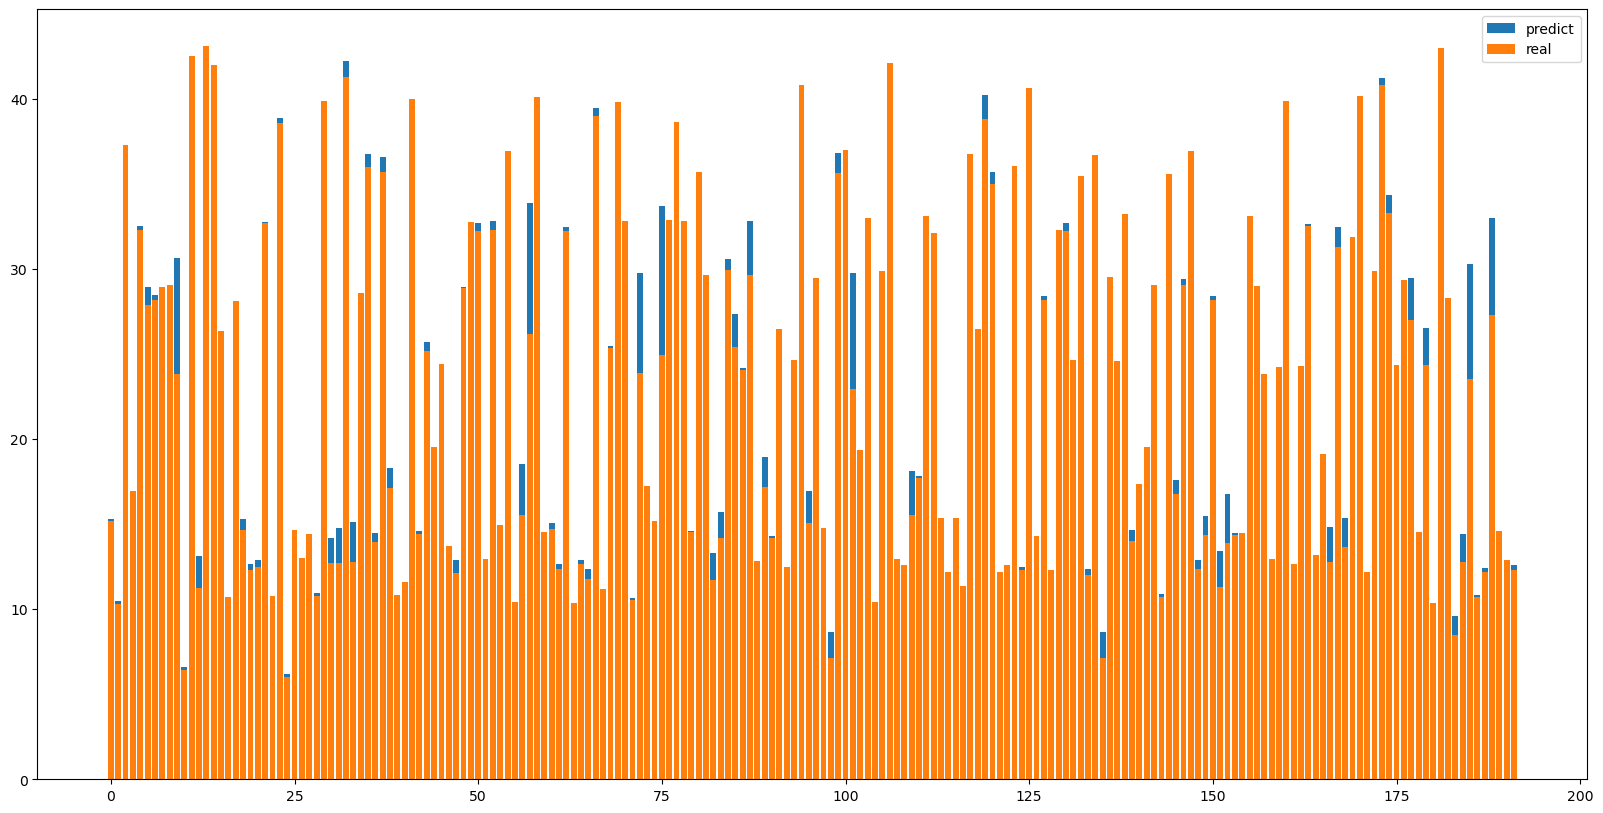

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(range(len(a)), a, label='predict')
plt.bar(range(len(b)), b, label='real')
plt.legend()

In [12]:
#R Square value
model.score(X_test_scaled, y_test)

0.9488273149045816